<a href="https://colab.research.google.com/github/sagar282004/Battery-Management-System-to-Estimate-the-SOC-of-an-EV-Cell/blob/main/BMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
fresh_df = pd.read_csv('Experimental_data_fresh_cell.csv')
aged_df = pd.read_csv('Experimental_data_aged_cell.csv')

In [4]:
fresh_df.info()
aged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358309 entries, 0 to 358308
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         358309 non-null  float64
 1   Current      358309 non-null  float64
 2   Voltage      358309 non-null  float64
 3   Temperature  358309 non-null  float64
dtypes: float64(4)
memory usage: 10.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307513 entries, 0 to 307512
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         307513 non-null  float64
 1   Current      307513 non-null  float64
 2   Voltage      307513 non-null  float64
 3   Temperature  307513 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [5]:
print("\n")
print("                  Fresh Battery Cell")
print("\n")
print(fresh_df.head(10))
print("\n")
print("                  Aged Battery Cell")
print("\n")
print(aged_df.head(10))
print("\n")



                  Fresh Battery Cell


       Time   Current   Voltage  Temperature
0  0.000000  2.158704  2.999607    26.384377
1  1.000000  2.287674  2.999407    26.227879
2  2.000000  2.228280  2.999757    26.449251
3  2.999992  2.224886  2.999857    26.277494
4  4.000000  2.134946  2.999958    26.380539
5  5.000000  2.148522  2.999407    26.254581
6  6.000000  2.146825  2.999557    26.262211
7  7.000000  2.078946  2.999407    26.418709
8  8.000000  2.067067  2.999407    26.380539
9  9.000000  2.078946  2.999557    26.143908


                  Aged Battery Cell


       Time    Current   Voltage  Temperature
0  0.000000   2.360728  2.999311    27.449894
1  1.000008   2.303036  2.999813    27.724861
2  2.000008   2.284371  2.999863    27.545357
3  3.000008   2.221588  2.999863    27.457523
4  4.000008   2.158805  2.999813    27.484249
5  5.000008   2.096023  2.999311    27.671408
6  6.000008   2.040028  2.999562    27.610302
7  7.000008   2.028150  2.999913    27.499533
8  8.00001

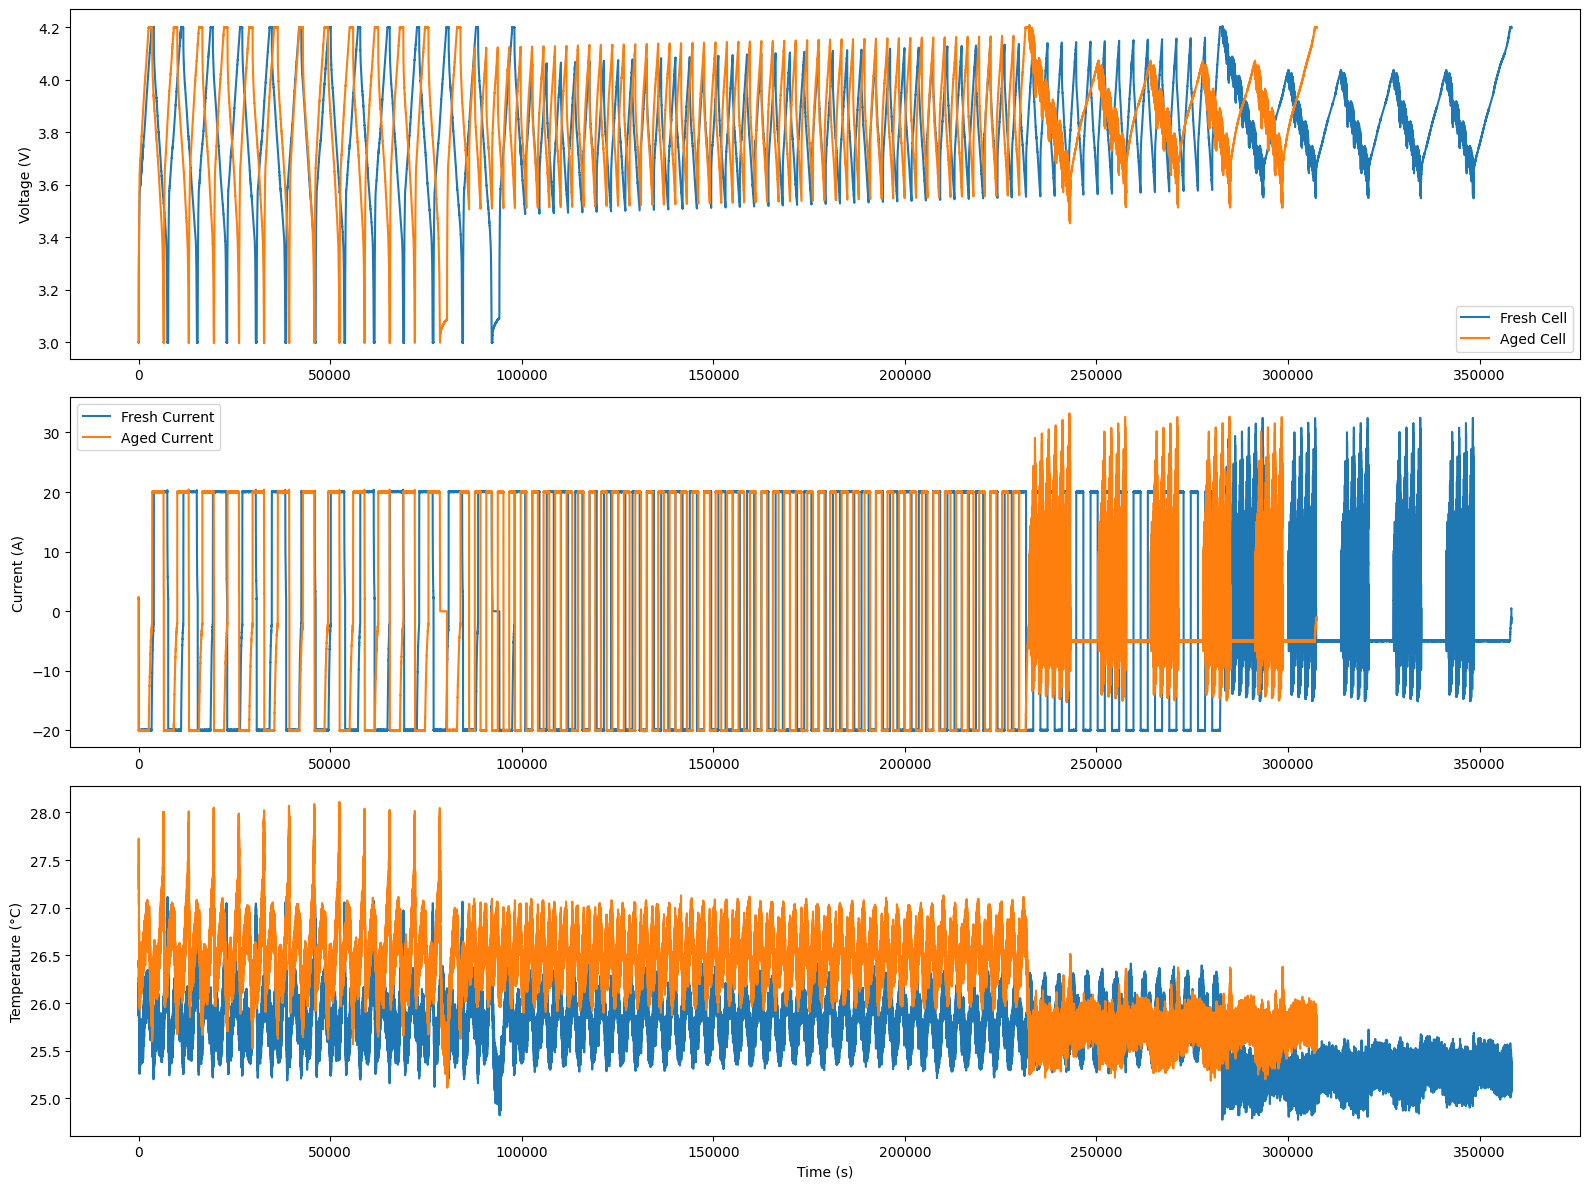

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(16,12))  # 2 rows, 1 column

# VOLTAGE VS TIME PLOT

ax[0].plot(fresh_df['Time'], fresh_df['Voltage'], label='Fresh Cell')
ax[0].plot(aged_df['Time'], aged_df['Voltage'], label='Aged Cell')
ax[0].set_ylabel('Voltage (V)')
ax[0].legend()

# CURRENT VS TIME PLOT

ax[1].plot(fresh_df['Time'], fresh_df['Current'], label='Fresh Current')
ax[1].plot(aged_df['Time'], aged_df['Current'], label='Aged Current')
ax[1].set_ylabel('Current (A)')
ax[1].legend()

#TEMPERATURE VS TIME PLOT

ax[2].plot(fresh_df['Time'], fresh_df['Temperature'], label='Fresh Cell')
ax[2].plot(aged_df['Time'], aged_df['Temperature'], label='Aged Cell')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

In [7]:
def estimate_soc(df, nominal_capacity_Ah=2.0):

    dt = df['Time'].diff().fillna(0)

    charge_delta = df['Current'] * dt / 3600.0

    cum_charge = charge_delta.cumsum()

    soc = 1 - (cum_charge / nominal_capacity_Ah)
    return soc.clip(0, 1)

fresh_df['estimated_soc'] = estimate_soc(fresh_df)
aged_df['estimated_soc'] = estimate_soc(aged_df)

In [8]:
print("\n")
print("            Fresh Battery Cell with estimated soc")
print("\n")
print(fresh_df.head(10))
print("\n")
print("            Aged Battery Cell with estimated soc")
print("\n")
print(aged_df.head(10))
print("\n")



            Fresh Battery Cell with estimated soc


       Time   Current   Voltage  Temperature  estimated_soc
0  0.000000  2.158704  2.999607    26.384377       1.000000
1  1.000000  2.287674  2.999407    26.227879       0.999682
2  2.000000  2.228280  2.999757    26.449251       0.999373
3  2.999992  2.224886  2.999857    26.277494       0.999064
4  4.000000  2.134946  2.999958    26.380539       0.998767
5  5.000000  2.148522  2.999407    26.254581       0.998469
6  6.000000  2.146825  2.999557    26.262211       0.998171
7  7.000000  2.078946  2.999407    26.418709       0.997882
8  8.000000  2.067067  2.999407    26.380539       0.997595
9  9.000000  2.078946  2.999557    26.143908       0.997306


            Aged Battery Cell with estimated soc


       Time    Current   Voltage  Temperature  estimated_soc
0  0.000000   2.360728  2.999311    27.449894       1.000000
1  1.000008   2.303036  2.999813    27.724861       0.999680
2  2.000008   2.284371  2.999863    27.545357     

In [9]:
def estimate_internal_resistance(df):

    dV = df['Voltage'].diff().fillna(0)
    dI = df['Current'].diff().fillna(0)

    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        r_internal = dV / dI
        r_internal[~np.isfinite(r_internal)] = np.nan
    return r_internal

fresh_df['internal_resistance'] = estimate_internal_resistance(fresh_df)
aged_df['internal_resistance'] = estimate_internal_resistance(aged_df)

In [10]:
fresh_df['internal_resistance'] = fresh_df['internal_resistance'].fillna(fresh_df['internal_resistance'].mean())
aged_df['internal_resistance'] = aged_df['internal_resistance'].fillna(aged_df['internal_resistance'].mean())

In [11]:
print('      \n           Fresh Battery Cell with estimated soc and internal resistance\n')

fresh_df.head(10)

      
           Fresh Battery Cell with estimated soc and internal resistance



,Time,Current,Voltage,Temperature,estimated_soc,internal_resistance
0,0.000000,2.158704,2.999607,26.384377,1.000000,0.000021
1,1.000000,2.287674,2.999407,26.227879,0.999682,-0.001552
2,2.000000,2.228280,2.999757,26.449251,0.999373,-0.005901
3,2.999992,2.224886,2.999857,26.277494,0.999064,-0.029492
4,4.000000,2.134946,2.999958,26.380539,0.998767,-0.001116
5,5.000000,2.148522,2.999407,26.254581,0.998469,-0.040587
6,6.000000,2.146825,2.999557,26.262211,0.998171,-0.088520
7,7.000000,2.078946,2.999407,26.418709,0.997882,0.002213
8,8.000000,2.067067,2.999407,26.380539,0.997595,-0.000000
9,9.000000,2.078946,2.999557,26.143908,0.997306,0.012644


In [12]:
print('      \n           Aged Battery Cell with estimated soc and internal resistance\n')

aged_df.head(10)

      
           Aged Battery Cell with estimated soc and internal resistance



,Time,Current,Voltage,Temperature,estimated_soc,internal_resistance
0,0.000000,2.360728,2.999311,27.449894,1.000000,-0.000270
1,1.000008,2.303036,2.999813,27.724861,0.999680,-0.008687
2,2.000008,2.284371,2.999863,27.545357,0.999363,-0.002684
3,3.000008,2.221588,2.999863,27.457523,0.999054,-0.000000
4,4.000008,2.158805,2.999813,27.484249,0.998754,0.000798
5,5.000008,2.096023,2.999311,27.671408,0.998463,0.007983
6,6.000008,2.040028,2.999562,27.610302,0.998180,-0.004475
7,7.000008,2.028150,2.999913,27.499533,0.997898,-0.029551
8,8.000015,-20.049273,3.108820,27.526283,1.000000,-0.004933
9,9.000000,-20.017035,3.119144,27.476620,1.000000,0.320259


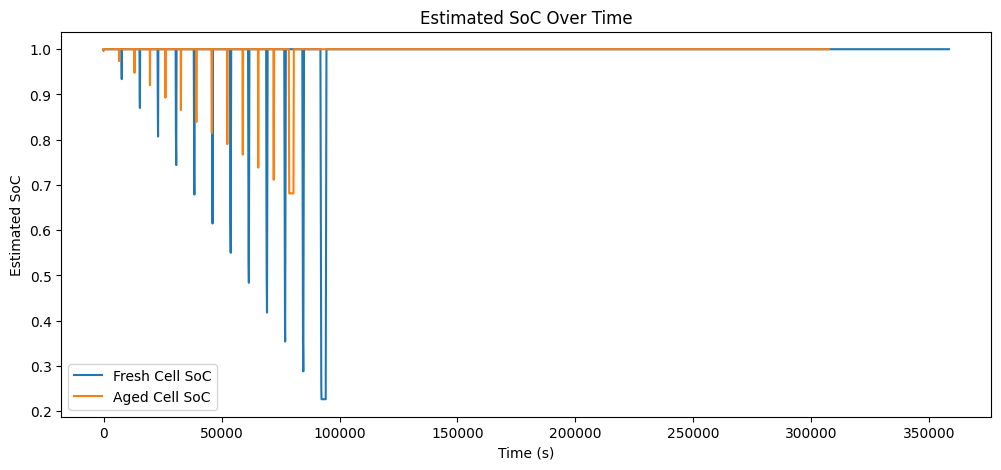

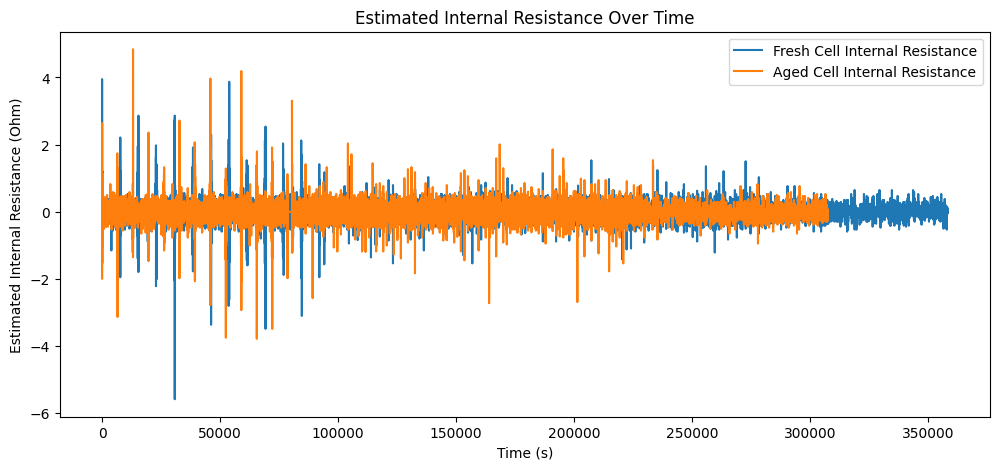

In [13]:
plt.figure(figsize=(12,5))
plt.plot(fresh_df['Time'], fresh_df['estimated_soc'], label='Fresh Cell SoC')
plt.plot(aged_df['Time'], aged_df['estimated_soc'], label='Aged Cell SoC')
plt.xlabel('Time (s)')
plt.ylabel('Estimated SoC')
plt.legend()
plt.title('Estimated SoC Over Time')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(fresh_df['Time'], fresh_df['internal_resistance'], label='Fresh Cell Internal Resistance')
plt.plot(aged_df['Time'], aged_df['internal_resistance'], label='Aged Cell Internal Resistance')
plt.xlabel('Time (s)')
plt.ylabel('Estimated Internal Resistance (Ohm)')
plt.legend()
plt.title('Estimated Internal Resistance Over Time')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

feature_cols = ['Voltage', 'Current', 'Temperature']
target_col = 'estimated_soc'

X = fresh_df[feature_cols]
y = fresh_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head(10)

,Voltage,Current,Temperature
278982,3.852492,20.002344,25.830912
241996,3.748305,20.043072,25.365232
329947,3.890383,0.315794,25.209021
298993,3.971306,-4.953297,25.288891
274018,4.037676,-20.015602,26.006483
23064,2.999256,2.942704,26.392006
209868,3.855448,-19.923965,25.987410
215819,3.738888,20.019313,25.502634
264660,3.711689,20.044768,25.525545
65186,4.199116,-7.948449,25.533175


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
print("\n")
print("R² score on test set:", score)



R² score on test set: 0.8569060675123261


In [17]:
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)  # RMSE: lower is better


In [18]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, X, y, scoring=rmse_scorer, cv=kf)

print("Cross-validation RMSE scores:", cv_scores)
print("Average CV RMSE:", np.mean(cv_scores))


Cross-validation RMSE scores: [-0.02712369 -0.02685233 -0.02740833 -0.02716235 -0.02824669]
Average CV RMSE: -0.027358676175182044


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

score_lr = lr.score(X_test, y_test)
print("Linear Regression R² score:", score_lr)


Linear Regression R² score: 0.2202541979735494


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

score_gbr = gbr.score(X_test, y_test)
print("Gradient Boosting R² score:", score_gbr)

Gradient Boosting R² score: 0.8724999155043217


In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

score_dt = dt.score(X_test, y_test)
print("Decision Tree R² score:", score_dt)

Decision Tree R² score: 0.7554418513702991


In [22]:
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": rf,
    "Linear Regression": lr,
    "Gradient Boosting": gbr,
    "Decision Tree": dt
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring=rmse_scorer, cv=kf)
    print(f"{name} average CV RMSE: {abs(np.mean(scores)):.4f}")

Random Forest average CV RMSE: 0.0274
Linear Regression average CV RMSE: 0.0628
Gradient Boosting average CV RMSE: 0.0260
Decision Tree average CV RMSE: 0.0363


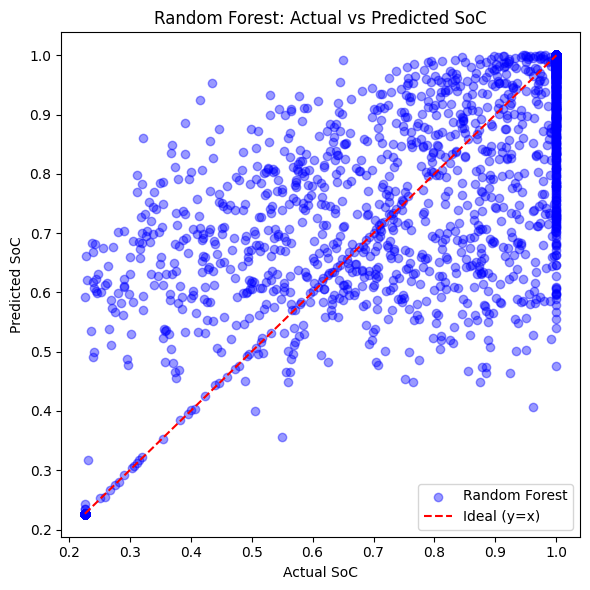

In [23]:
import matplotlib.pyplot as plt

# Get predictions from Random Forest as main example
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, label="Random Forest", color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Ideal (y=x)')
plt.xlabel("Actual SoC")
plt.ylabel("Predicted SoC")
plt.title("Random Forest: Actual vs Predicted SoC")
plt.legend()
plt.tight_layout()
plt.show()


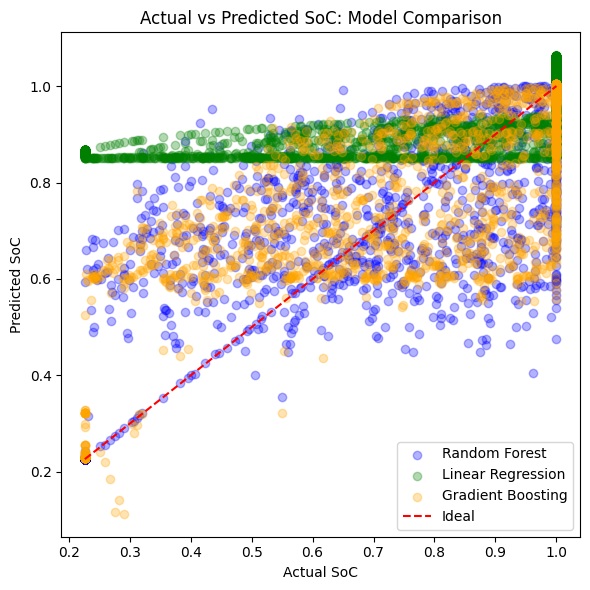

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, label="Random Forest", color='b')
plt.scatter(y_test, y_pred_lr, alpha=0.3, label="Linear Regression", color='g')
plt.scatter(y_test, y_pred_gbr, alpha=0.3, label="Gradient Boosting", color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual SoC")
plt.ylabel("Predicted SoC")
plt.legend()
plt.title("Actual vs Predicted SoC: Model Comparison")
plt.tight_layout()
plt.show()

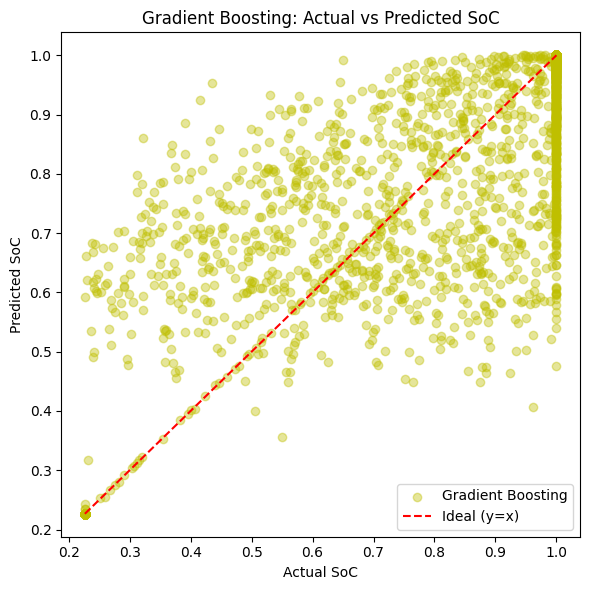

In [25]:
import matplotlib.pyplot as plt

# Get predictions from Gradient Boosting as main example
y_pred_gbr = gbr.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, label="Gradient Boosting", color='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Ideal (y=x)')
plt.xlabel("Actual SoC")
plt.ylabel("Predicted SoC")
plt.title("Gradient Boosting: Actual vs Predicted SoC")
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Replace with your actual observed values
new_data = pd.DataFrame([[3.72, 0.98, 27.5]],
                        columns=['Voltage', 'Current', 'Temperature'])


In [27]:
# Predict SoC for the new sample
predicted_soc = gbr.predict(new_data)
print(f"Predicted SoC for the trial sample: {predicted_soc[0]:.4f}")


Predicted SoC for the trial sample: 0.8838


In [28]:
# Example for multiple samples
trial_data = pd.DataFrame([
    [3.72, 0.98, 27.5],  # Sample 1
    [3.65, 1.05, 29.0],  # Sample 2
    [3.85, 0.80, 25.0]   # Sample 3
], columns=['Voltage', 'Current', 'Temperature'])

predicted_soc_multiple = gbr.predict(trial_data)
print("Predicted SoC values for multiple samples:", predicted_soc_multiple)


Predicted SoC values for multiple samples: [0.88383808 0.88383808 0.99876127]


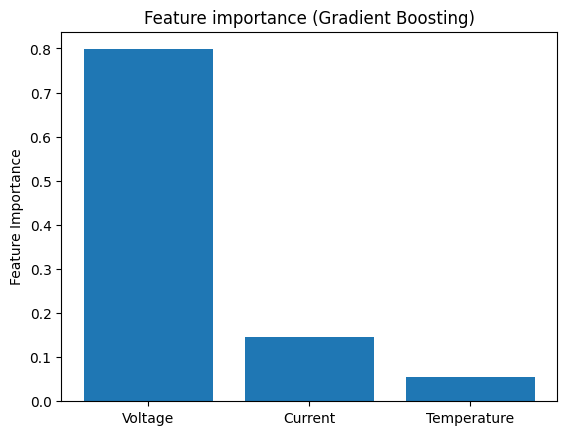

In [29]:
import matplotlib.pyplot as plt

importances = gbr.feature_importances_
plt.bar(['Voltage', 'Current', 'Temperature'], importances)
plt.ylabel('Feature Importance')
plt.title('Feature importance (Gradient Boosting)')
plt.show()

In [30]:
# Assign SoH proxy: 1.0 for fresh, <1 for aged (proxy by internal resistance ratio)
fresh_df['SoH'] = 1.0
mean_fresh_r = fresh_df['internal_resistance'].mean()
mean_aged_r = aged_df['internal_resistance'].mean()
soh_aged = mean_fresh_r / mean_aged_r if mean_aged_r > 0 else 0.85  # fallback if mean_aged_r==0
aged_df['SoH'] = soh_aged

# Combine datasets
full_df = pd.concat([fresh_df, aged_df], ignore_index=True)
